In [1]:
import csv
import sys
import os
import pandas as pd
import numpy as np
from numpy import *
from datetime import datetime
from operator import itemgetter
from collections import defaultdict

import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

%matplotlib inline

#plt.style.use('ggplot')
df=pd.read_excel('H:/lottery/ssq.xls',sheet_name='data')
df.columns=['num', 'date', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'b', 'sr1', 'sr2',
       'sr3', 'sr4', 'sr5', 'sr6', 'sales_volume', 'pool', 'first', 'bonus1', 'second', 'bonus2',
       'third', 'bonus3', 'fourth', 'bonus4', 'fifth', 'bonus5', 'sexth', 'bonus6']
#df.tail()
X = df[['b']]
X.columns =['sr0']
X.tail()

,sr0
2181,2
2182,11
2183,11
2184,11
2185,4


In [2]:

starttime = datetime.now()
(num_rows, num_columns) = X.shape
def creat_datasets(X, features ):
    df_ = pd.DataFrame(columns = list(range(0, features)))
    index = 0
    for i in range(features, num_rows+1):
        df_.loc[index] = X[col][i-features: i].reset_index(drop = True)
        index += 1
    return df_

for col in X.columns :
    locals()['df_'+ str(col)] = creat_datasets(X, 20)
endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')
# 至此数据集完成

10 seconds


In [10]:

def split_c(df_):
    # choose frequence >10 samples
    #df = df_[df_[99].isin(df_[99].groupby(df_[99]).count()[df_[99].groupby(df_[99]).count()>30].index)]
    X_ = df_.iloc[:, : -1].values
    y_ = df_.iloc[:, -1].astype(int).values.reshape(-1)
    #dataframe.as_matrix()
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=14)
    return X_, y_, X_train, X_test, y_train, y_test
def score_c(clf, cv=3):
    precision = cross_val_score(clf, X_, y_, cv=cv, scoring='precision_weighted')
    recall = cross_val_score(clf, X_, y_, cv=cv, scoring='recall_weighted')
    fls = cross_val_score(clf, X_, y_, cv=cv, scoring='f1_weighted')
    return precision, recall, fls

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    '''if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)'''

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def total_f(pipe_LinearSVC, param_LinearSVC):
    X_ = df_.iloc[:, : -1].values
    y_ = df_.iloc[:, -1].astype(int).values.reshape(-1)
    #dataframe.as_matrix()
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=14)
    
    grid_=GridSearchCV(pipe_LinearSVC, param_LinearSVC, n_jobs=-1, verbose=1, scoring='accuracy')
    #default=None, and the default scorer of DT is accuracy. see also DecisionTreeClassifier.score(X, y)
    grid_.fit(X_train, y_train)
    # evaluation for best parameters
    precision = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='precision_weighted')
    recall = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='recall_weighted')
    fls = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='f1_weighted')
    new = grid_.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    print(grid_.best_estimator_)
    
    class_names = np.unique(y_train)
    y_pred = grid_.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   33.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   33.4s finished


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


df_R0 [14] precison: [ 0.01  0.02  0.12] recall: [ 0.07  0.06  0.07] f1: [ 0.02  0.02  0.03]
Pipeline(steps=[('clf', LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=5000,
     multi_class='ovr', penalty='l2', random_state=14, tol=0.0001,
     verbose=1))])
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        29
          2       0.00      0.00      0.00        22
          3       0.03      0.09      0.05        23
          4       0.06      0.27      0.09        22
          5       0.00      0.00      0.00        23
          6       0.00      0.00      0.00        20
          7       0.05      0.11      0.06        28
          8       0.00      0.00      0.00        16
          9       0.00      0.00      0.00        29
         10       0.06      0.18      0.09        22
         11       0.09      0.06      0.07        33
         12       0.14    

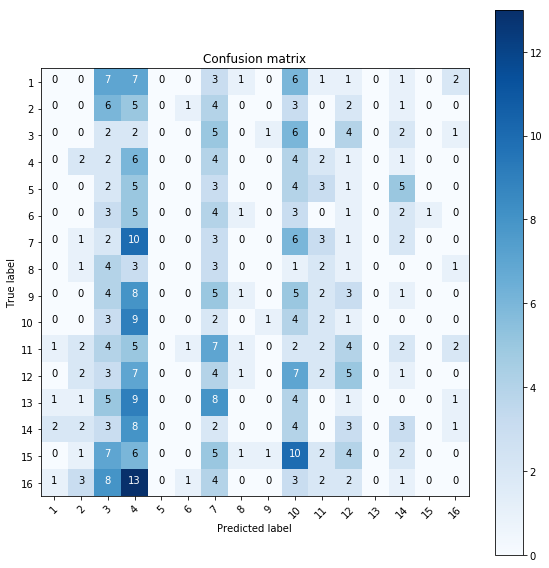

In [11]:
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_LinearSVC, param_LinearSVC)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   42.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   42.0s finished


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[LibLinear]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


df_R0 [6] precison: [ 0.01034727  0.02369253  0.12321617] recall: [ 0.07162534  0.06344828  0.0698324 ] f1: [ 0.01716118  0.01842781  0.03342304]
Pipeline(steps=[('clf', LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=5000,
     multi_class='ovr', penalty='l2', random_state=14, tol=0.0001,
     verbose=1))])
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        29
          2       0.00      0.00      0.00        22
          3       0.00      0.00      0.00        23
          4       0.00      0.00      0.00        22
          5       0.00      0.00      0.00        23
          6       0.04      0.25      0.07        20
          7       0.00      0.00      0.00        28
          8       0.00      0.00      0.00        16
          9       0.00      0.00      0.00        29
         10       0.00      0.00      0.00        22
         11       0.00    

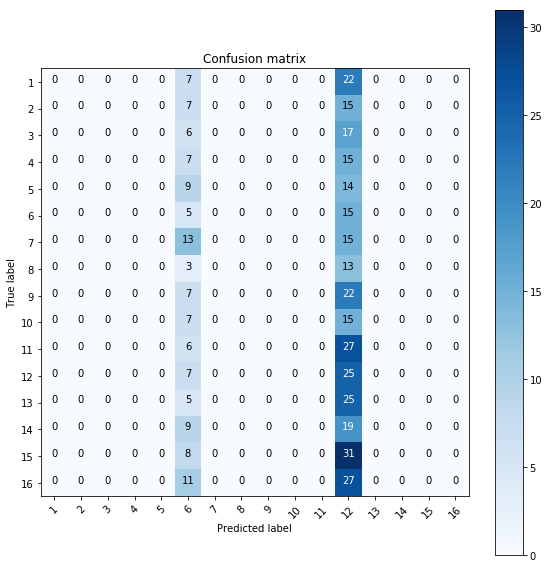

175 seconds


In [6]:
from sklearn.svm import LinearSVC
from datetime import datetime
starttime = datetime.now()
#start = time.time()

pipe_LinearSVC = Pipeline([('clf', LinearSVC(random_state=14))])
param_LinearSVC = {'clf__penalty': ['l2', ], #default = 'l2'
                   #The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
                   'clf__loss': ['squared_hinge', ], #default = 'squared_hinge'
                   #'hinge' is the standard SVM loss (used e.g. by the SVC class) while 'squared_hinge' is the square of the hinge loss.
                   'clf__dual': [True, ], #default = True
                   #Select the algorithm to either solve the dual or primal optimization problem.
                   #Prefer dual=False when n_samples > n_features.
                   'clf__tol': [0.0001, ], #default = 0.0001
                   #误差项达到指定值时则停止训练
                   'clf__C': [1, 5], #default = 1
                   #相当于松弛变量
                   'clf__multi_class': ['ovr', ], #default = 'ovr'
                   'clf__fit_intercept': [True, ], #default = True
                   'clf__intercept_scaling': [1, ], #default = 1
                   'clf__class_weight': ['balanced', ], #default = None
                   'clf__verbose': [1, ], #default = 0
                   'clf__max_iter': [-1, ] #default = 1000
                  }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    #df_ = df_.iloc[:,-30:]
    X_, y_, X_train, X_test, y_train, y_test = split_c(df_)
    
    grid_LinearSVC=GridSearchCV(pipe_LinearSVC, param_LinearSVC, n_jobs=-1, verbose=1, scoring='accuracy')
    #default=None, and the default scorer of DT is accuracy. see also DecisionTreeClassifier.score(X, y)
    grid_LinearSVC.fit(X_, y_)
    # evaluation for best parameters
    precision, recall, fls = score_c(grid_LinearSVC.best_estimator_)
    new = grid_LinearSVC.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    print(grid_LinearSVC.best_estimator_)
    
    class_names = np.unique(y_train)
    y_pred = grid_LinearSVC.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [49]:
from sklearn.svm import LinearSVC
X_ = df_.iloc[:, : -1].values
y_ = df_.iloc[:, -1].astype(int).values
clf = LinearSVC()
clf.fit(X_, y_)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [52]:
y_ = df.iloc[:, -1].values
y_

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)